# Behavioural Patterns

- How do individual objects collaborate to achieve a common goal?

- Each object is a piece of a larger solution, so for each to work effectively, it needs a set purpose
    - Like individuals in a company

## Template Method Pattern

- Example:
    - Suppose you are a head chef at a restaurant chain. 
    - You want the dishes across all outlets to be consistent, so you need to provide instructions for making every dish. 
    - Some steps are common (boil water, boil pasta, pour sauce, garnish plates)
    - Some steps are different (different steps for making different sauces, different ingredients)

- In the example above, a good way to arrange the logical steps to create different dishes is using **template method**
    - Template method defines an algorithm's step generally, deferring the implementation of some steps to subclasses
    - Principle here is **generalisation**
    - Useful when you have 2 classes with very similar functionality!

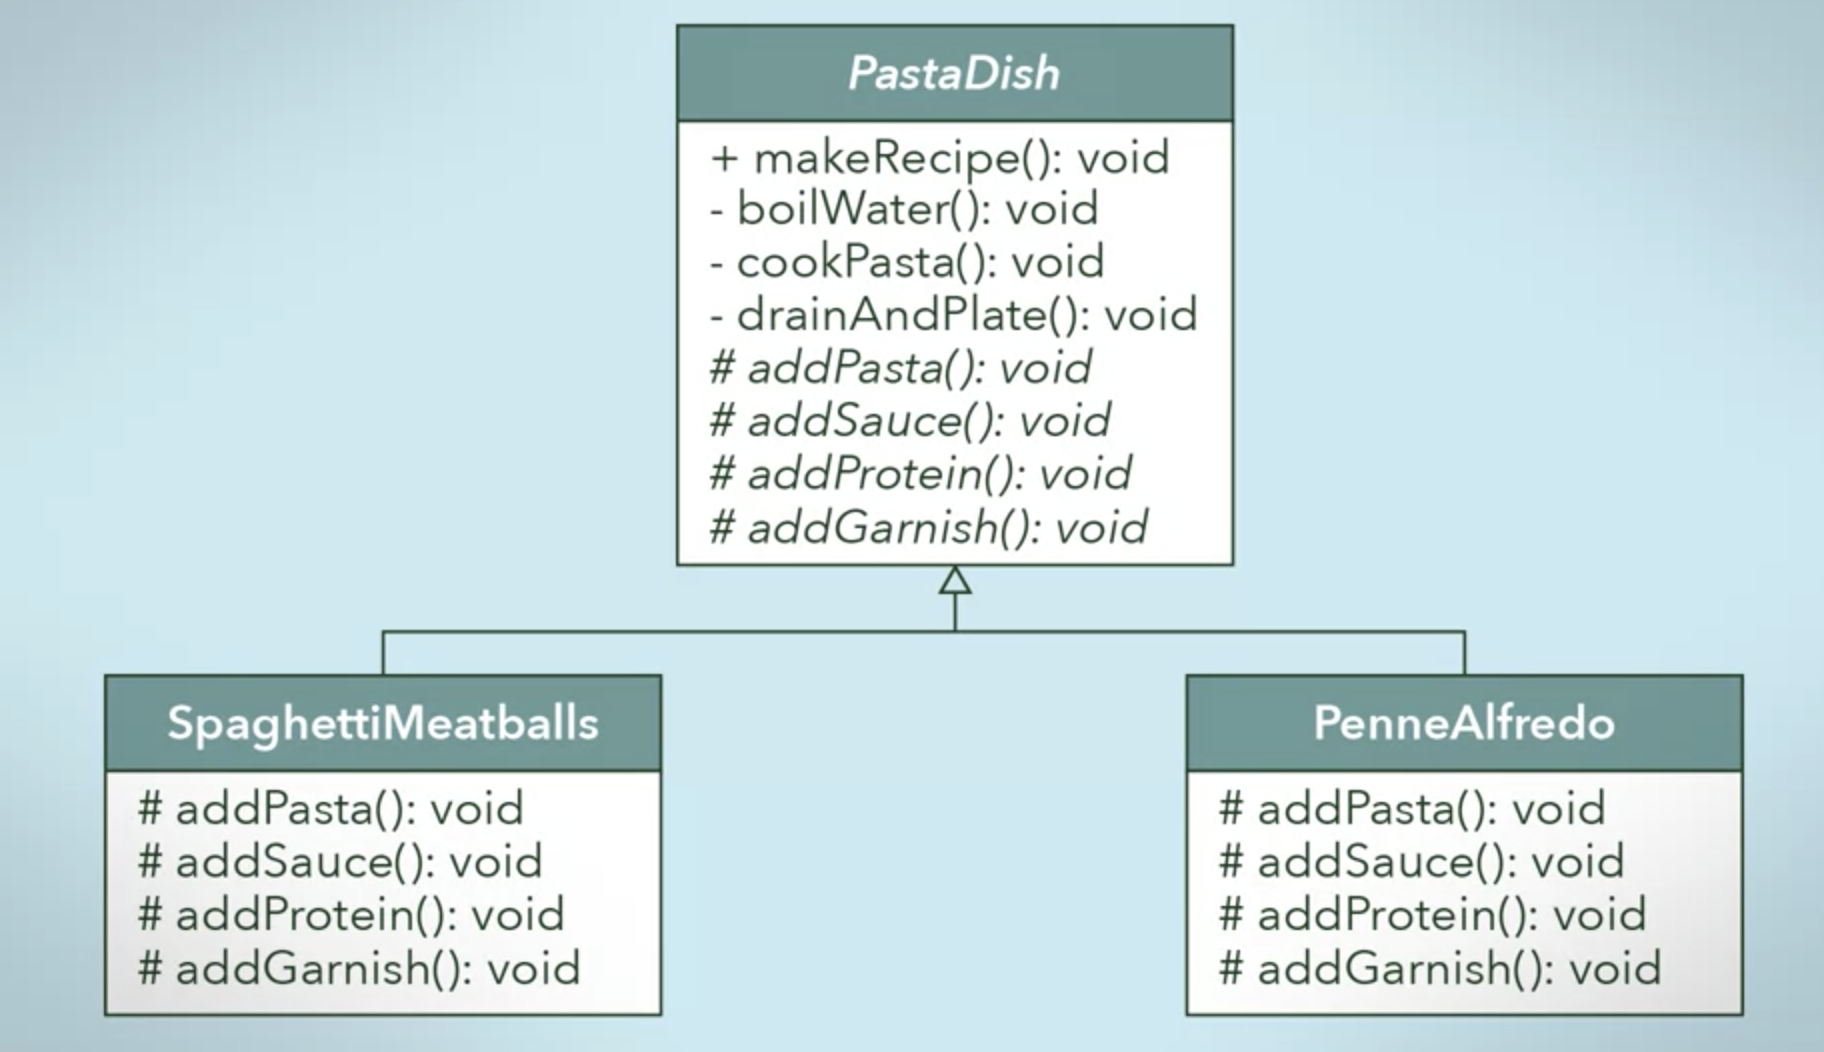

In [ ]:
from abc import ABCMeta, abstractmethod
from typing import final

class PastaDish(metaclass=ABCMeta):
    
    @final
    def makePasta(self):
        self.boilWater()
        self.addPasta()
        self.cookPasta()
        self.drainAndPlate()
        self.addSauce()
        self.addProtein()
        self.addGarnish()
    
    @abstractmethod
    def addPasta(self):
        ...
    
    @abstractmethod
    def addSauce(self):
        ...

    @abstractmethod
    def addProtein(self):
        ...

    @abstractmethod
    def addGarnish(self):
        ...

    def boilWater(self):
        print("Boiling water...")

    def cookPasta(self):
        print("Cooking pasta...")

    def drainAndPlate(self):
        print("Draining and plating pasta...")

class SpaghettiMeatballs(PastaDish):
    def addPasta(self):
        print("Adding spaghetti...")

    def addProtein(self):
        print("Adding meatballs...")

    def addSauce(self):
        print("Adding tomato sauce...")

    def addGarnish(self):
        print("Adding parmesan cheese...")

class PenneAlfredo(PastaDish):
    def addPasta(self):
        print("Adding penne...")

    def addProtein(self):
        print("Adding chicken...")

    def addSauce(self):
        print("Adding Alfredo sauce...")

    def addGarnish(self):
        print("Adding parsley...")

## Chain of Responsibility Pattern

- Chain of object that are responsible for handling requests
- Example:
    - Getting help from healthcare system
    - Go to polyclinic --> get referred to specialist --> Get triaged by nurses etc..
    - You don't care how and who solves your problem, only that it gets solved
    - Request --> handler --> handler --> handler....

- Example 2:
    - Say you are fixing a chair, and you need a tool to tighten a specific screw
    - You take each screwdriver and try until 1 works

- This can be used in many situations
    - In an email service, you can create filters until your inbox successfully filters what you consider spam

- You can often combine this with the **template** pattern, because each "handler" is very similar to the others in the methods they implement

- This will also help avoid coupling sender to receiver!

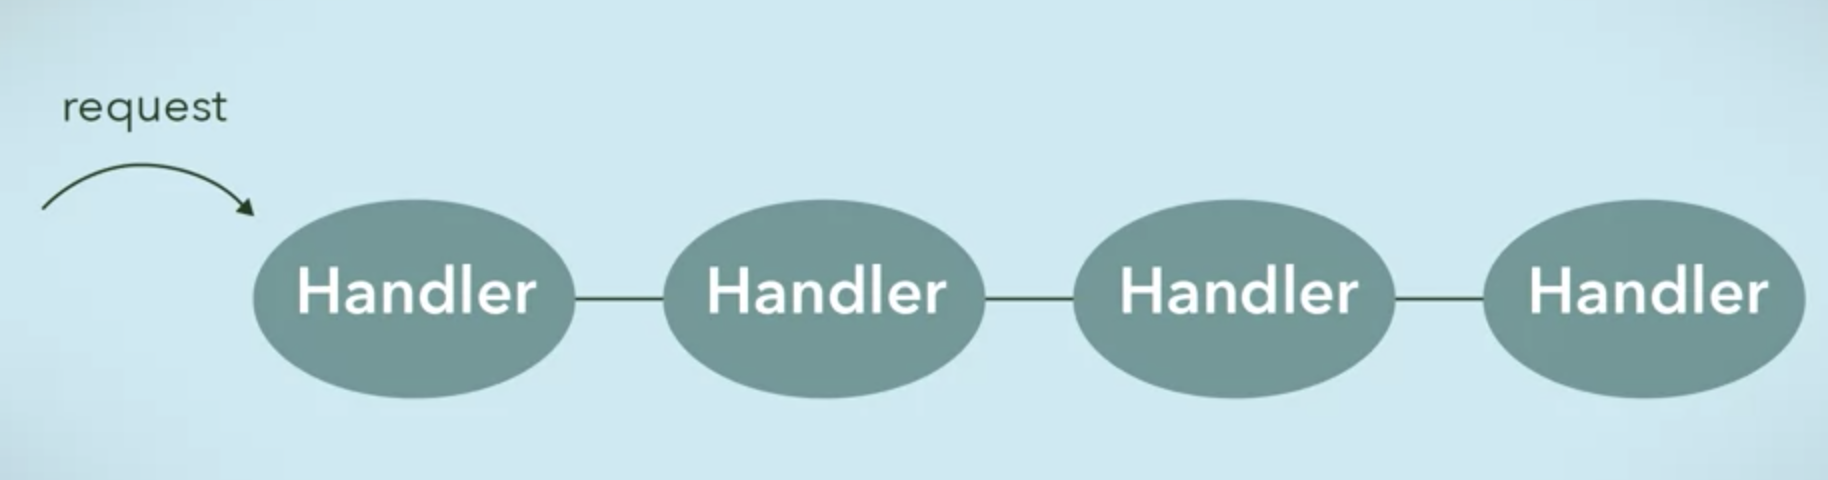

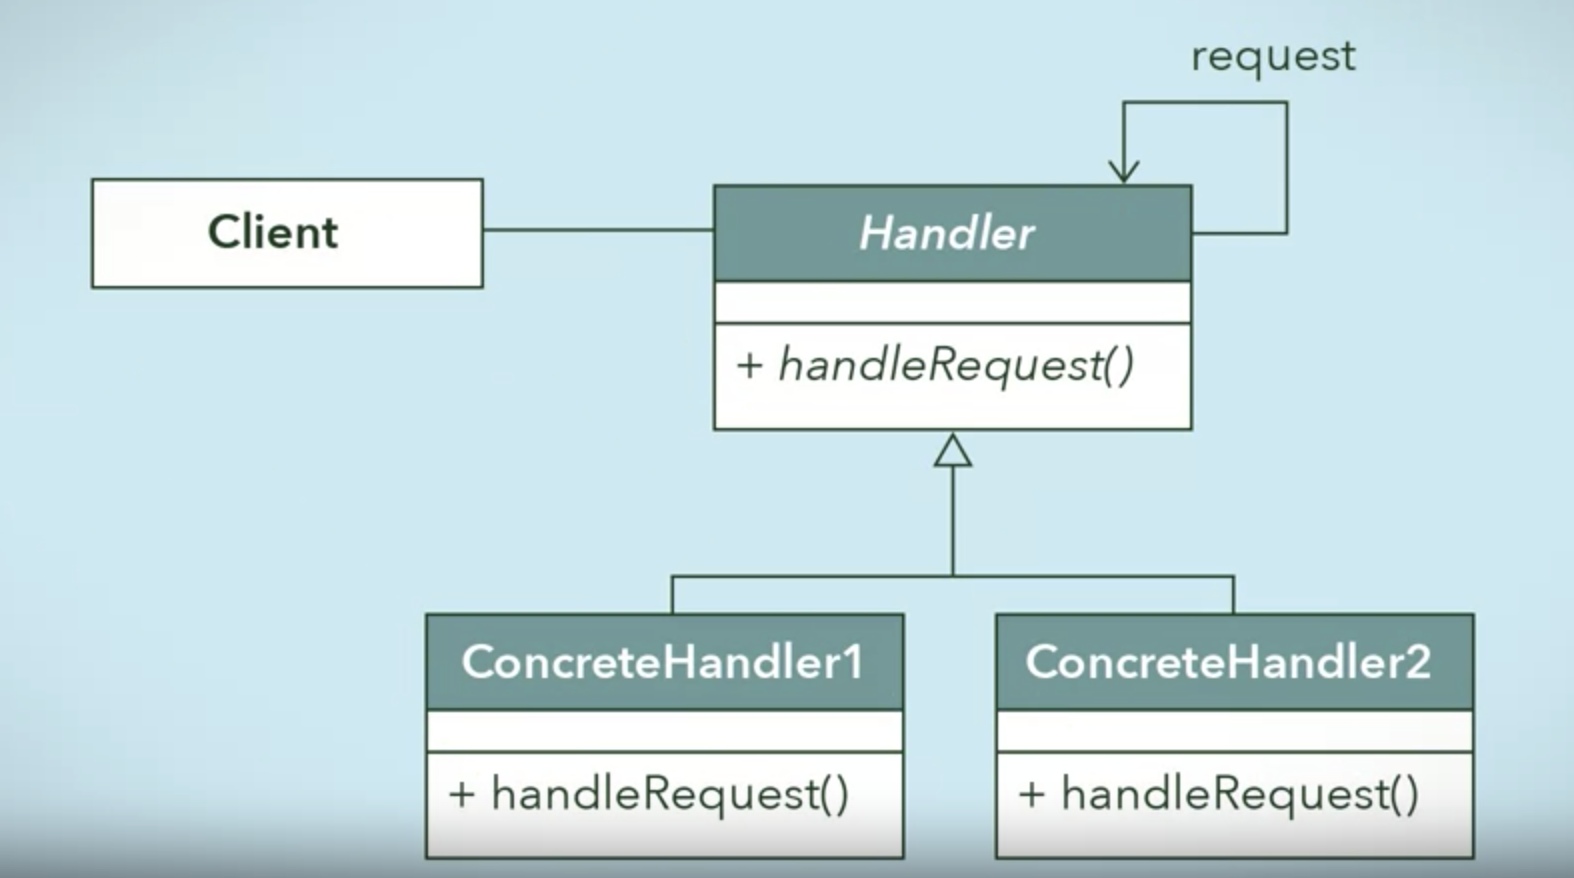

In [38]:
from abc import ABCMeta, abstractmethod
from typing import final
import random

class HandlerTemplate(metaclass=ABCMeta):
    @abstractmethod
    def _request_handler(self):
        ...

    @property
    def next_handler(self):
        return self.next_handler
    
    @next_handler.setter
    def next_handler(self, value):
        self._next_handler = value

    def handle_request(self):
        try:
            self._request_handler()
        except:
            print(f'Handle request failed for {self.__class__}. Trying next handler...')
            # print(self._next_handler)
            self._next_handler().handle_request()

class Handler1(HandlerTemplate):
    def __init__(self):
        #print('Initing Handler1')
        self.next_handler = HandlerFinal

    def _request_handler(self):
        #print(f'Requesting {self.__class__} to handle request')
        if random.random() < 0.5:
            print(f'{self.__class__} handled request')
        else:
            raise ValueError(f'{self.__class__} unable to handle request')

class HandlerFinal(HandlerTemplate):
    def __init__(self):
        #print('Initing HandlerFinal')
        self.next_handler = 0

    def _request_handler(self):
        #print(f'Requesting {self.__class__} to handle request')
        print(f'{self.__class__} handled request')

test=Handler1()
test.handle_request()


<class '__main__.Handler1'> handled request


## State Pattern

- Where objects in your code change behaviour based on current state
- Used when you need to change behaviour of the object based on state it is in at run-time

- Example:
    - Vending machine has several states and specific behaviour based on those states
    - Let's suppose I want to buy a chocolate bar
    - Possible sequences:
        - insert money --> make selection --> dispense bar --> end
        - insert money --> REGRET --> refund --> end
    - Possible states:
        - Idle
        - Has 1 dollar
        - Out of stock
    - Possible triggers/events
        - Insert $1
        - Eject money
        - Dispense

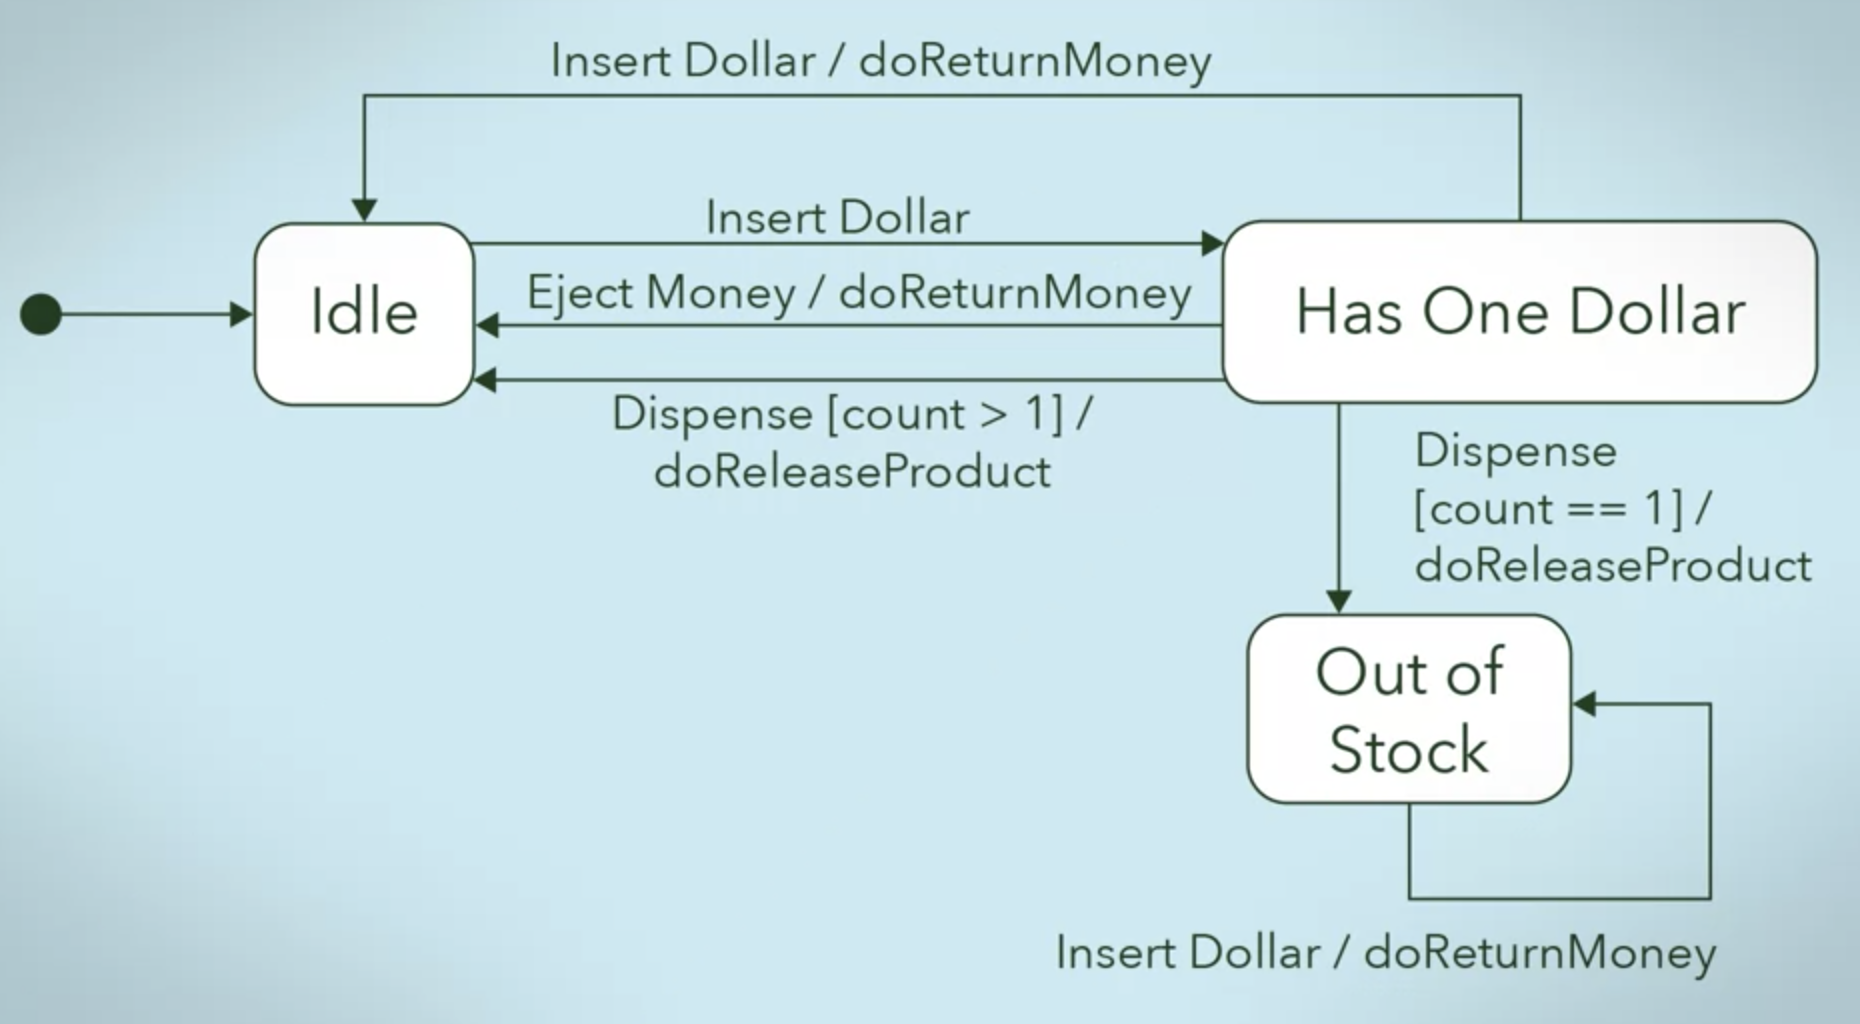

This is one way to design the vending machine class. Notice how the state singletons don't do much besides maintain a unique state identity (i.e. you cannot instantiate the state classes multiple times due to singleton design).

In [57]:
from typing import Optional

class StateSingleton(metaclass=ABCMeta):
    def __new__(cls):
        if not getattr(cls, 'instance', False):
            print('No state found, instantiating')
            cls.instance = super().__new__(cls)
            return cls.instance
        else:
            print('State already instantiated')
            return cls.instance
    
class Idle(StateSingleton):
    ...

class HasOneDollar(StateSingleton):
    ...

class OutOfStock(StateSingleton):
    ...

class VendingMachine:
    def __init__(self, count: int):
        if count > 0:
            self.__current_state = Idle()
            self.__count: Optional[int] = count
        else:
            self.__current_state: Optional[StateSingleton] = OutOfStock()
            self.__count: Optional[int] = 0

    def insert_dollar(self):
        if self.__current_state is Idle(): ##not just equal to, but singleton lets us compare if the Idle() state is the same entity as current state
            self.__current_state = HasOneDollar()
        elif self.__current_state is HasOneDollar():
            self.return_money()
            self.__current_state = Idle()
        elif self.__current_state is OutOfStock():
            self.return_money()

    def return_money(self):
        print('Returning your money...')

Let's try to redeign what we have here in some way. 

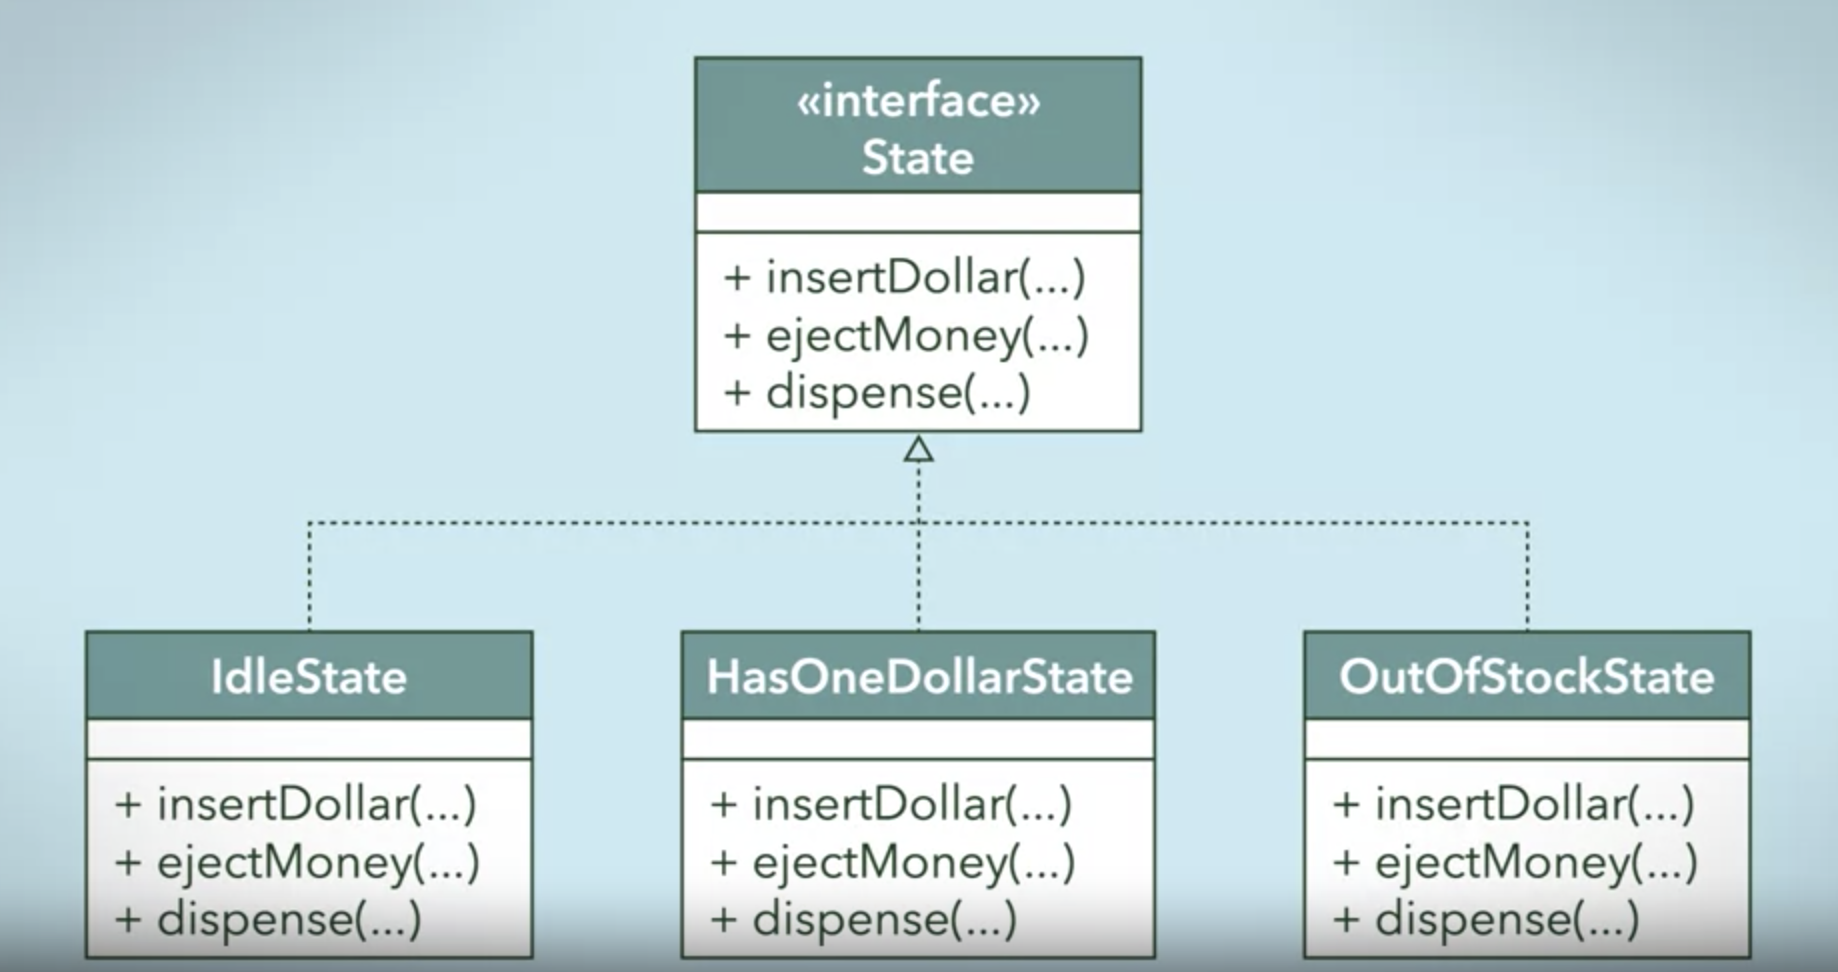

General structure of state pattern:

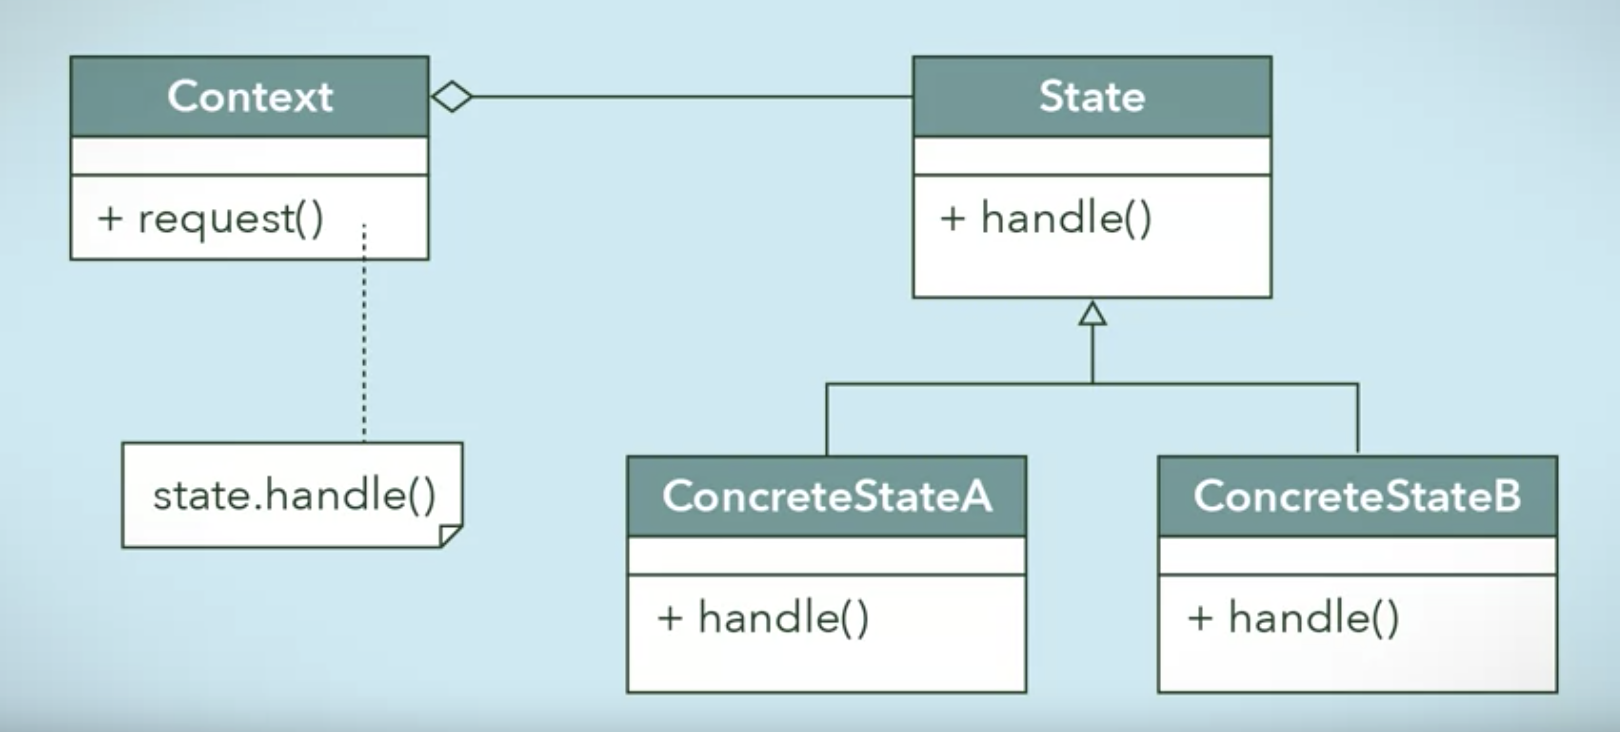

In [19]:
from abc import ABCMeta, abstractmethod
from typing import Optional

class StateInterface(metaclass=ABCMeta):
    @abstractmethod
    def insert_dollar(self, vending_machine: 'VendingMachine'):
        ...

    @abstractmethod
    def eject_money(self, vending_machine: 'VendingMachine'):
        ...

    @abstractmethod
    def dispence(self, vending_machine: 'VendingMachine'):
        ...

class VendingMachine:
    __idle_state: StateInterface
    __has_one_dollar_state: StateInterface
    __out_of_stock_state: StateInterface
    __current_state: StateInterface
    __count: int

    def __init__(self, count: int):
        self.__idle_state = IdleState()
        self.__has_one_dollar_state = HasOneDollarState()
        self.__out_of_stock_state = OutOfStockState()
    
        if (count > 0):
            self.__current_state = self.__idle_state
            self.__count = count
        else:
            self.__current_state = self.__out_of_stock_state
            self.__count = 0
    
    def set_current_state(self, state: str):
        if state == 'idle':
            self.__current_state = self.__idle_state
        elif state == 'hasonedollar':
            self.__current_state = self.__has_one_dollar_state
        elif state == 'outofstock':
            self.__current_state = self.__out_of_stock_state
        
    def get_count(self):
        return self.__count
    
    def insert_dollar(self):
        self.__current_state.insert_dollar(self)

    def eject_money(self):
        self.__current_state.eject_money(self)

    def dispence(self):
        self.__current_state.dispence(self)

    def return_money(self):
        print('Returning money...')

    def release_product(self):
        print('Releasing 1 product...')

class IdleState(StateInterface):
    def insert_dollar(self, vending_machine: VendingMachine):
        print('Dollar inserted')
        vending_machine.set_current_state('hasonedollar')

    def eject_money(self, vending_machine: VendingMachine):
        print('No money to return')
    
    def dispence(self, vending_machine: VendingMachine):
        print('Payment required')

class HasOneDollarState(StateInterface):
    def insert_dollar(self, vending_machine: VendingMachine):
        print('Already has a dollar')
        vending_machine.return_money()
        vending_machine.set_current_state('idle')

    def eject_money(self, vending_machine: VendingMachine):
        print('Money Eject Requested')
        vending_machine.return_money()
        vending_machine.set_current_state('idle')
    
    def dispence(self, vending_machine: VendingMachine):
        print('Purchase Made')
        if vending_machine.get_count() > 1:
            vending_machine.release_product()
            vending_machine.set_current_state('idle')
        else:
            vending_machine.release_product()
            vending_machine.set_current_state('outofstock')

class OutOfStockState(StateInterface):
    def insert_dollar(self, vending_machine: VendingMachine):
        print('No inventory to dispense')
        vending_machine.return_money()

    def eject_money(self, vending_machine: VendingMachine):
        print('No money to return')
    
    def dispence(self, vending_machine: VendingMachine):
        print('No inventory to dispense')

vm = VendingMachine(10)
vm.insert_dollar()
vm.dispence()
vm.dispence()
# vm.eject_money()
# vm.eject_money()

Dollar inserted
Purchase Made
Releasing 1 product...
Payment required


## Command Pattern

- Encapsulates request as an object of its own
- So instead of `Sender --calls method--> Receiver`, where the sender needs to know the implementation of the receiver class, you can do `Sender --creates--> Command --calls method--> Receiver`
- This separates the sender from the receiver, a form of encapsulation

- Command pattern relies on a few other objects 
    - `Invoker` to tell the downstream receiver what to do
    - `Command manager` to keep track of the commands
    - These can be combined into 1

- Where can you implement this pattern?
    - To store and schedule different requests
    - When an object calls another object's method, you can't really do much to interfere with the method calls. If every request is a command object, you can manuipulate them as you would other objects
        - e.g. store into lists
        - manipulate them before they are completed, put them into queue etc


- Since the commands are objects, this enables undo and redo!
    - You have 2 lists, `HistoryList` and `RedoList`
    - Each time a command is executed, it goes into `HistoryList`
    - When you want to undo command, pop the latest item from the `HistoryList` stack, undo the change, and append to the `RedoList` stack

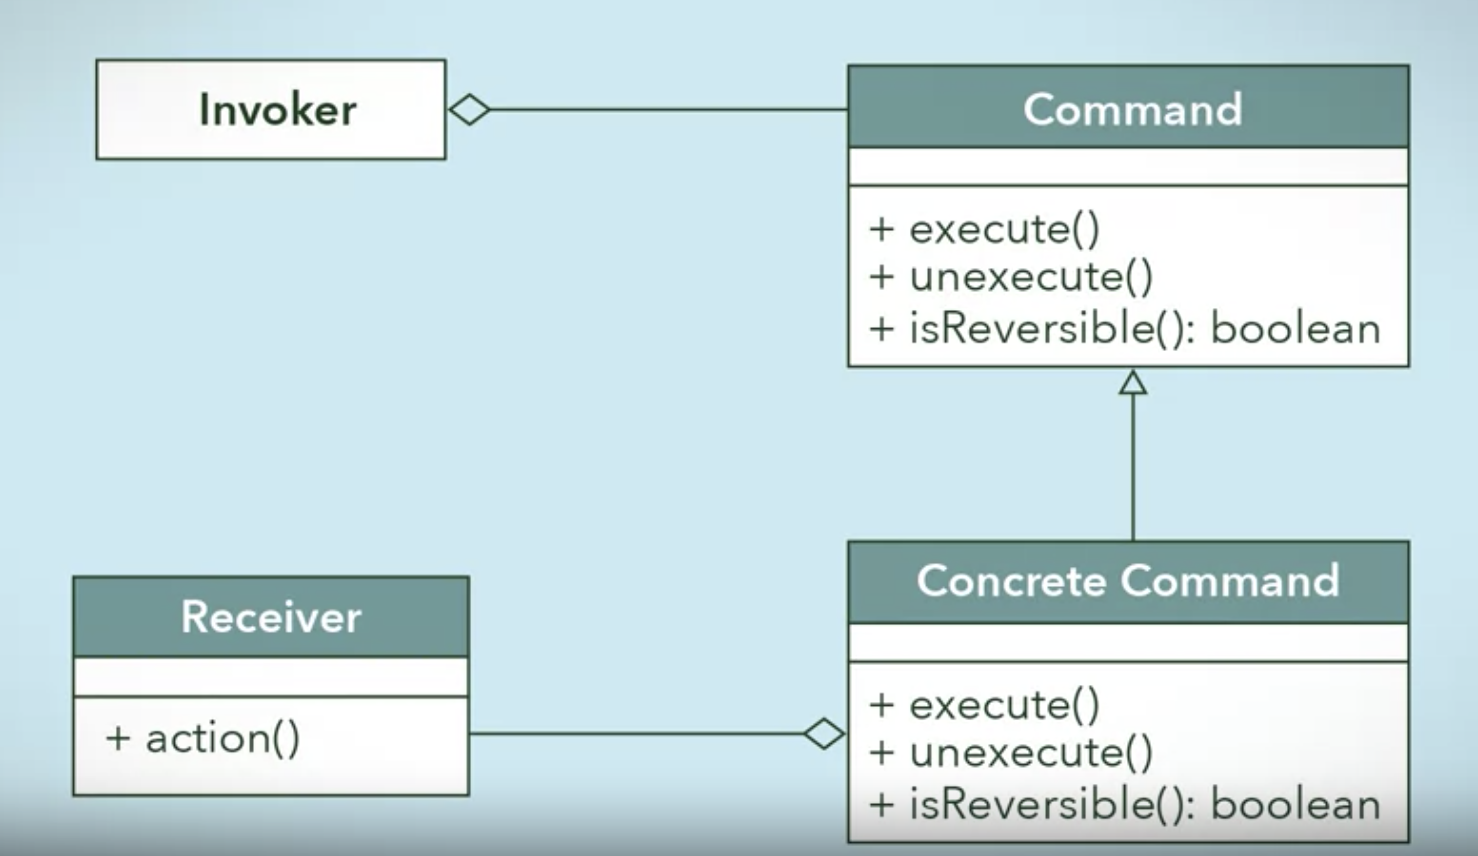


In [20]:
from abc import ABCMeta

class CommandSuperClass(metaclass=ABCMeta):
    ...

class Document:
    def insert_text(self, position: int, text: str):
        ...

    def delete_text(self, position: int, text: str):
        ...

class PasteCommand(CommandSuperClass):
    document: Document 
    position: int
    text: str

    def __init__(self, document: Document, position: int, text: str):
        self.document = document
        self.position = position
        self.text = text

    def execute(self):
        self.document.insert_text(self.position, self.text)
    
    def unexecute(self):
        self.document.delete_text(self.position, self.text)

    def is_reversible(self):
        return True
    
class CommandManager:
    
    def invoke_command(self, command: CommandSuperClass):
        ...

command_manager = CommandManager()
command = PasteCommand(Document(), 1, 'some string')
command_manager.invoke_command(command)

- Command objects  
    - allows you to manipuate commands as objects
    - decouples objects in software

## Mediator Pattern

- The idea is that, if you have multiple objects that need to talk to each other, you may run into a combinatorial problem. 

- So instead of managing $N^2$ interactions, you code each object to speak to a mediator object, which then enables some functionality

- But the downside here is that the mediator can quickly become large, which can make it difficult to debug

## Observer Pattern

- Imagine you have a site you really enjoy. You refresh the page every few hours, hoping for new content. At some point, you decide to write a script that informs you when new content drops
    - How frequently do you ping the site? If you do it too often, you get IP Blocked for DDOS. If you don't, then you may miss out on great content

- Obviously, the ideal solution here is for the blog to notify you when there is new content. 

- So the `subject` here (the site), will maintain a list of `observers` (subscribers), and informs them of any changes to its state

- Let's frame the example:
    - We have a `subject` superclass with 
        - 3 methods
            - Allow a new observer to subscribe
            - Allow a current observer to unsubscribe
            - Notify all observers about a new blog post
        - 1 attribute
            - To keep track of all observers
    - We make a `observer` interface to allow an observer to be notified to update itself
    - `blog` class to subclass the `subject` superclass
    - `subscriber` class to implement `observer` interface

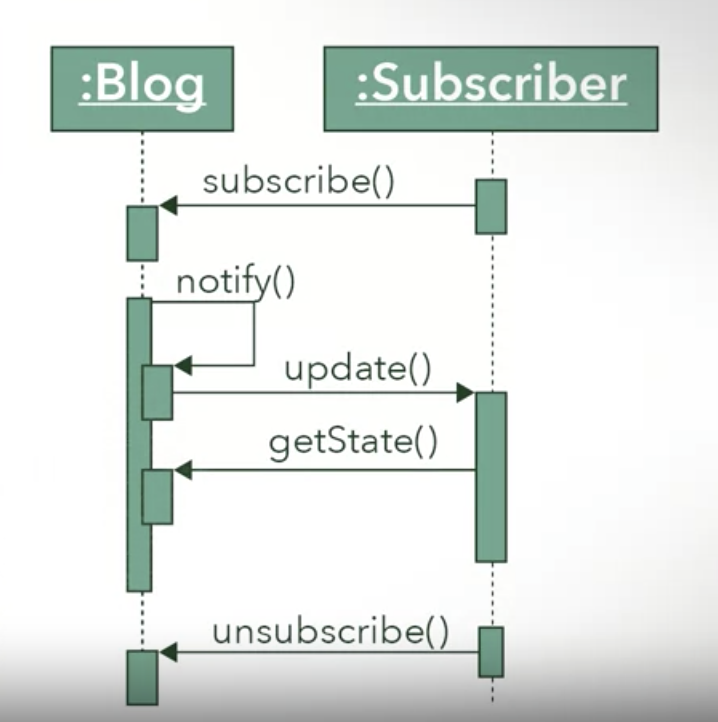

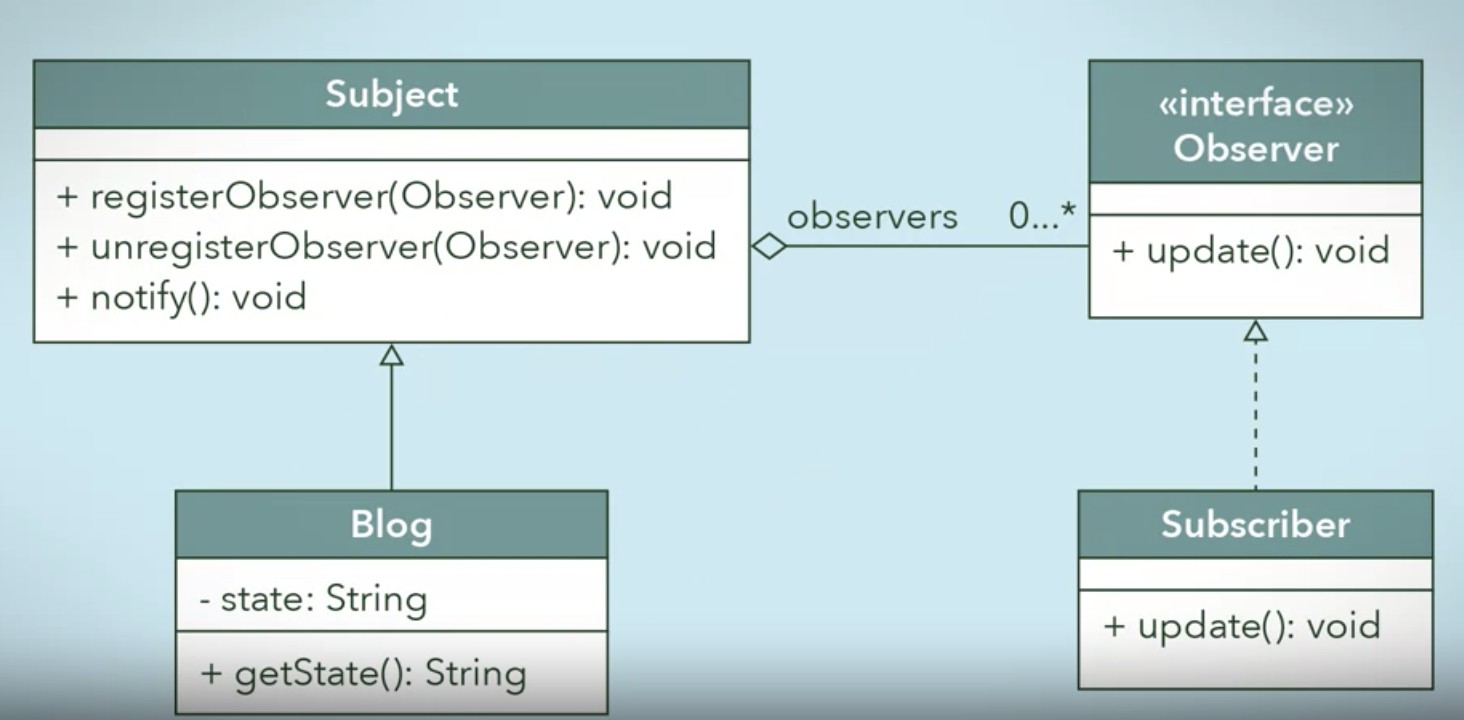

In [1]:
from abc import ABCMeta, abstractmethod, abstractproperty
from typing import List

class Subject(metaclass=ABCMeta):
    
    def __init__(self):
        self._observers : List[Optional[Observer]] = []

    @property
    def observers(self) -> List[Optional[Observer]]:
        return self._observers
    
    def register_observer(self, observer: Observer):
        self._observers.append(observer)

    def unregister_observer(self, observer: Observer):
        self._observers.remove(observer)
    
    def notify(self):
        for obs in self._observers:
            obs.update()

class Blog(Subject):
    
    def __init__(self):
        self._state=None
    
    @property
    def state(self) -> Optional[str]:
        return self._state
    
class Observer(metaclass=ABCMeta):
    @abstractmethod
    def update(self):
        ...

